In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import r2_score, recall_score, precision_score, classification_report, confusion_matrix, accuracy_score, f1_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.read_csv(r"C:\Users\praja\Desktop\IIIT-B Notes\telecom customter churn Prediction\telecom_churn_data.csv")

In [8]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [9]:
df.shape

(99999, 226)

In [10]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [11]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


## 1) Data Preparation

In [12]:
# Dropping id an,d date columns as it wont't be useful in any analysis and  model building
df.drop(['mobile_number',	"circle_id"], axis=1, inplace = True)

In [13]:
df.shape

(99999, 224)

#### Handling Missing Values

In [14]:
missing_values = df.isnull().sum()/len(df)*100
missing_values

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_

In [15]:
# In most of the rechage columns minimum ammount is 1 but in some columns there is no value
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [16]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


so in recharge variables where the value is null can be impute with zero, as the consumer didn't recharge for that month.

In [17]:
# list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [18]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [19]:
# lets check the values are imputed correctly or not
df[zero_impute].isnull().sum()*100/len(df)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [20]:
df[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


#### Replacing NAN values in categorical variables 

Replacing NAN values in categorical variable with -1 where -1 is new category

In [21]:
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8', 'night_pck_user_9','fb_user_6', 'fb_user_7','fb_user_8','fb_user_9' ]

In [22]:
df[cat_cols] =  df[cat_cols].apply(lambda x : x.fillna(-1))

In [23]:
100*df[cat_cols].isnull().sum()/len(df)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [24]:
# Lets check the remaining missing values
missing_values = df.isnull().sum()/len(df)*100
missing_values

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_

Remove the columns which has more than 40% missing values

In [25]:
col = missing_values[missing_values > 40].index
col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [26]:
df.drop(columns = col, axis = 1,inplace=True)

In [27]:
df.isnull().sum() / len(df) * 100

loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t_mou_7        3.859039
loc_og_t2t_mou_8        5.378054
loc_og_t2t

In [28]:
df.shape

(99999, 204)

In [29]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.00000

#### Following Columns have only 1 unique values

In [30]:
single_val_column = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                    'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
                    'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
                    'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                    'last_date_of_month_9']

As these columns contain only 1 category it's of no use for analysis and model building  therefore we can drop this columns

In [31]:
df.drop(single_val_column,axis = 1, inplace=True)

In [32]:
df.shape

(99999, 189)

Deleting the date columns as the date columns are not required in our analysis

In [33]:
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [34]:
df.drop(date_cols,axis = 1, inplace=True)

In [35]:
df.shape

(99999, 185)

In [36]:
df.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 
           'sep_vbc_3g' : 'vbc_3g_9'}, axis=1,inplace=True)

In [37]:
missing_values = df.isnull().sum()/len(df)*100
missing_values

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t2f_mou_7      3.859039
loc_og_t2f_mou_8      5.378054
loc_og_t2f_mou_9      7.745077
loc_og_t

# ------------------------------------------------------------------------------------

### i) Deriving new Features

In [38]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.0

In [39]:
mou = df.filter(like = 'arpu').columns.tolist()
mou

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']

In [40]:
rech = df.filter(like = 'rech').columns.tolist()
rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

From above we can derive more meaningful informations
- Average Recharge Number
- maximum Recharge Amount
- Average Recharge Amount
- Average Revenue per user in 4 months

##### calculate total data recharge amount

In [41]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

##### Adding total data recharge and total recharge to get total combined recharge amount for a month

In [42]:
# calculate total recharge amount for June and July --> data recharge amount + call recharge amount 
df['amt_data_6'] = df.total_data_rech_6 + df.total_rech_amt_6 
df['amt_data_7'] = df.total_data_rech_7 + df.total_rech_amt_7

In [43]:
# calculate average recharge done by customer in June and July
df['avg_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [44]:
df['avg_amt_data_6_7'].describe((0.25,0.5,0.7,1))

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
100%     61236.000000
max      61236.000000
Name: avg_amt_data_6_7, dtype: float64

Recharge amount at 70th percentile is 478

Retaining those customers who spend the amoung on recharge more than or equal to 70th quantile amount

In [45]:
 x = df['avg_amt_data_6_7'].quantile(0.7)

In [46]:
df2 = df[df['avg_amt_data_6_7'] >= x]

In [47]:
df2.shape

(30001, 190)

In [48]:
# delete variables created to filter high-value customers
df2 = df2.drop(['total_data_rech_6', 'total_data_rech_7',
             'amt_data_6', 'amt_data_7', 'avg_amt_data_6_7'], axis=1)
df2.shape

(30001, 185)

### iii) Tag churners and remove attributes of the churn phase

In [49]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

df2['Churn'] = np.where((df2['total_ic_mou_9'] == 0) & (df2['total_og_mou_9'] ==0) &
                       (df2['vol_2g_mb_9'] == 0) & (df2['vol_3g_mb_9'] == 0), 1, 0)

In [50]:
df2.Churn.dtype

dtype('int32')

In [51]:
# change data type to category
df2.Churn = df2.Churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(df2.Churn.value_counts()*100/df2.shape[0])

Churn Ratio:
Churn
0    91.863605
1     8.136395
Name: count, dtype: float64


Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [52]:
drop = df2.filter(like = '9').columns
drop

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9', 'vbc_3g_9'],
      dtype='object')

In [53]:
df2.drop(drop,axis = 1,inplace=True)

# ------------------------------------------------------------------------------------

#### Handling other Missing values

In [54]:
(df2.isnull().sum()/len(df))*100

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           0.545005
onnet_mou_7           0.537005
onnet_mou_8           1.174012
offnet_mou_6          0.545005
offnet_mou_7          0.537005
offnet_mou_8          1.174012
roam_ic_mou_6         0.545005
roam_ic_mou_7         0.537005
roam_ic_mou_8         1.174012
roam_og_mou_6         0.545005
roam_og_mou_7         0.537005
roam_og_mou_8         1.174012
loc_og_t2t_mou_6      0.545005
loc_og_t2t_mou_7      0.537005
loc_og_t2t_mou_8      1.174012
loc_og_t2m_mou_6      0.545005
loc_og_t2m_mou_7      0.537005
loc_og_t2m_mou_8      1.174012
loc_og_t2f_mou_6      0.545005
loc_og_t2f_mou_7      0.537005
loc_og_t2f_mou_8      1.174012
loc_og_t2c_mou_6      0.545005
loc_og_t2c_mou_7      0.537005
loc_og_t2c_mou_8      1.174012
loc_og_mou_6          0.545005
loc_og_mou_7          0.537005
loc_og_mou_8          1.174012
std_og_t2t_mou_6      0.545005
std_og_t2t_mou_7      0.537005
std_og_t

From above we can consider that null values are less then `2%`.
Therefore we will remove this observations

In [55]:
df2.dropna(inplace=True,ignore_index=True)

In [56]:
df2.isnull().sum().any()

False

In [57]:
df2.shape

(28504, 140)

In [58]:
# create column name list by types of columns
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','Churn']

In [59]:
num_cols = [column for column in df2.columns if column not in  cat_cols]

#### Exploratory Data Analysis

In [60]:
# change columns types
df2[num_cols] = df2[num_cols].apply(pd.to_numeric)
df2[cat_cols] = df2[cat_cols].apply(lambda column: column.astype("category"), axis=0)

#### Univariate Analysis

In [61]:
# Function to determine data type
def dtype(variable):
    if np.issubdtype(variable.dtype, np.number):
        return 'numerical'
    elif variable.dtype.name == 'category':
        return 'categorical'
    else:
        return 'other'

# Function for univariate analysis
def uni(variable, stats=True):
    if dtype(variable) == 'numerical':
        sns.histplot(variable, kde=True)
        if stats:
            print(variable.describe())
    elif dtype(variable) == 'categorical':
        sns.countplot(variable)
        if stats:
            print(variable.value_counts())
    else:
        print("Invalid variable passed: Please pass either a numeric or a categorical variable.")


count    28504.000000
mean       560.375015
std        448.960314
min      -2258.709000
25%        317.360500
50%        485.169000
75%        698.914000
max      27731.088000
Name: arpu_6, dtype: float64


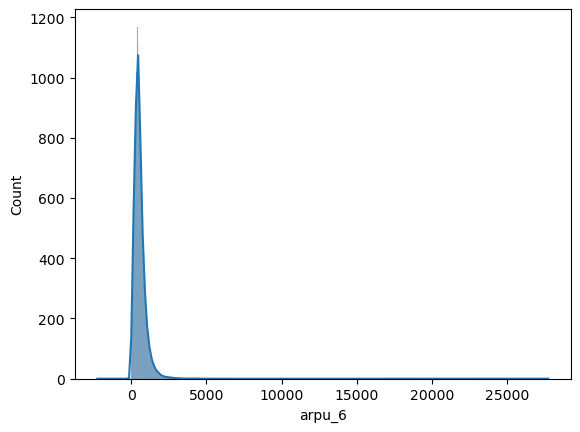

In [62]:
uni(df2.arpu_6)

count    28504.000000
mean        67.128772
std        164.378035
min          0.000000
25%          7.200000
50%         26.550000
75%         69.617500
max       6351.440000
Name: loc_ic_t2t_mou_6, dtype: float64


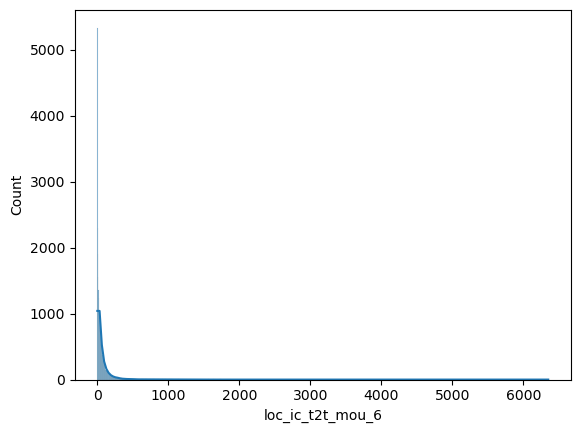

In [64]:
uni(df2.loc_ic_t2t_mou_6)

count    28504.000000
mean       167.660538
std        402.624337
min          0.000000
25%          0.000000
50%          3.485000
75%        117.045000
max       7366.580000
Name: std_og_t2t_mou_6, dtype: float64


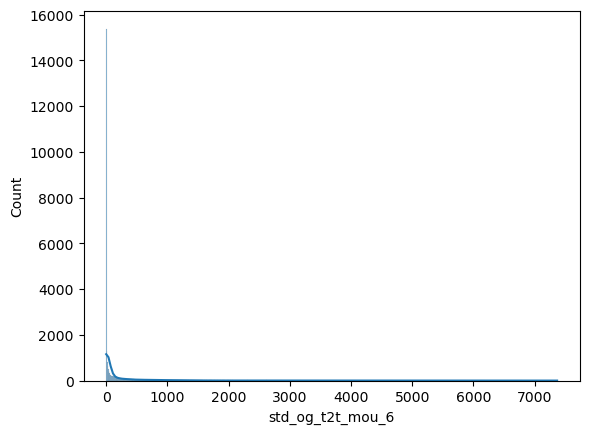

In [65]:
uni(df2.std_og_t2t_mou_6)

count    28504.000000
mean       275.933639
std        482.671988
min          0.000000
25%         19.530000
50%         89.910000
75%        304.895000
max       8157.780000
Name: onnet_mou_7, dtype: float64


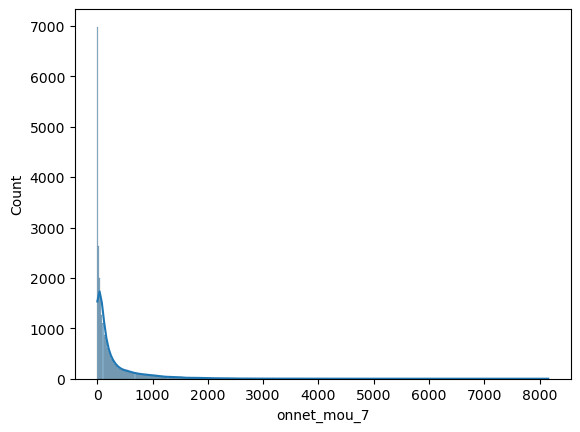

In [66]:
uni(df2.onnet_mou_7)

count    28504.000000
mean       647.877844
std        718.807786
min          0.000000
25%        137.240000
50%        448.315000
75%        912.507500
max      11365.310000
Name: total_og_mou_7, dtype: float64


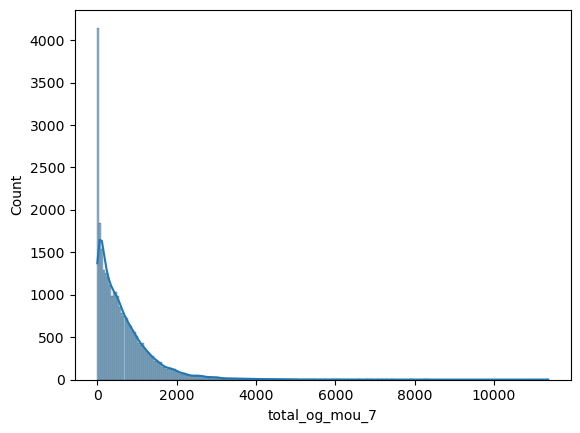

In [67]:
uni(df2.total_og_mou_7)

count    28504.000000
mean       345.593459
std        882.736381
min          0.000000
25%          0.000000
50%          0.000000
75%        359.977500
max      29651.830000
Name: vol_3g_mb_8, dtype: float64


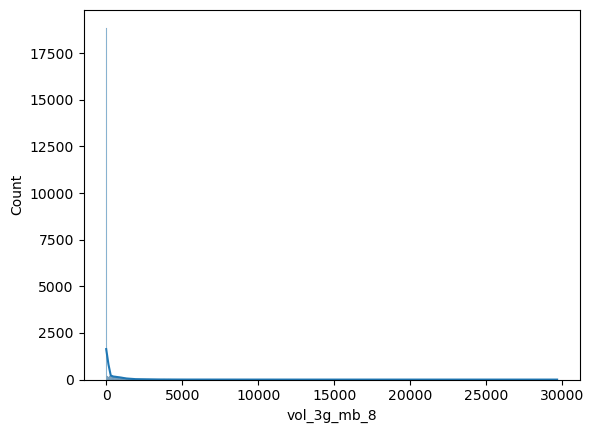

In [68]:
uni(df2.vol_3g_mb_8)

As we can see from the above plot, the variables are skewed towards left.

### Outlier Treatment

In [69]:
# Outlier Treatments by capping outliers using the K-Sigma Technique
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [70]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=3))

Array after capping outliers: 
 [-4194     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  4291]


In [71]:
# cap outliers in the numeric columns
df2[num_cols] = df2[num_cols].apply(cap_outliers, axis=0)

count    28504.000000
mean       630.483395
std        635.706694
min          0.000000
25%        137.240000
50%        448.315000
75%        912.507500
max       2804.301202
Name: total_og_mou_7, dtype: float64


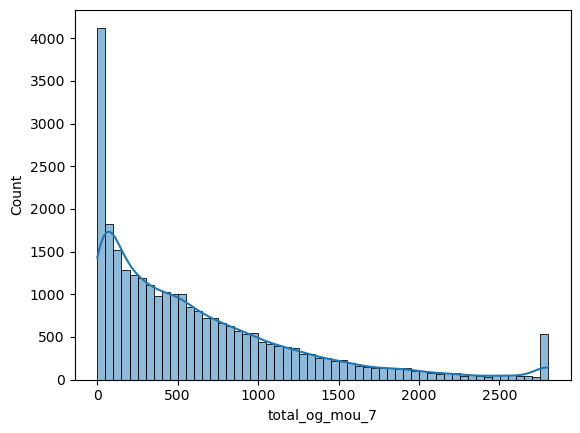

In [72]:
# lets check the outlier of one of the variable
uni(df2.total_og_mou_7)

### Bivariate Analysis

In [73]:
a = list(df2.columns)
a

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

#### Dealing with Numerical Data

In [74]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = df2
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [75]:
recharge_amnt_columns =  df2.columns[df2.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

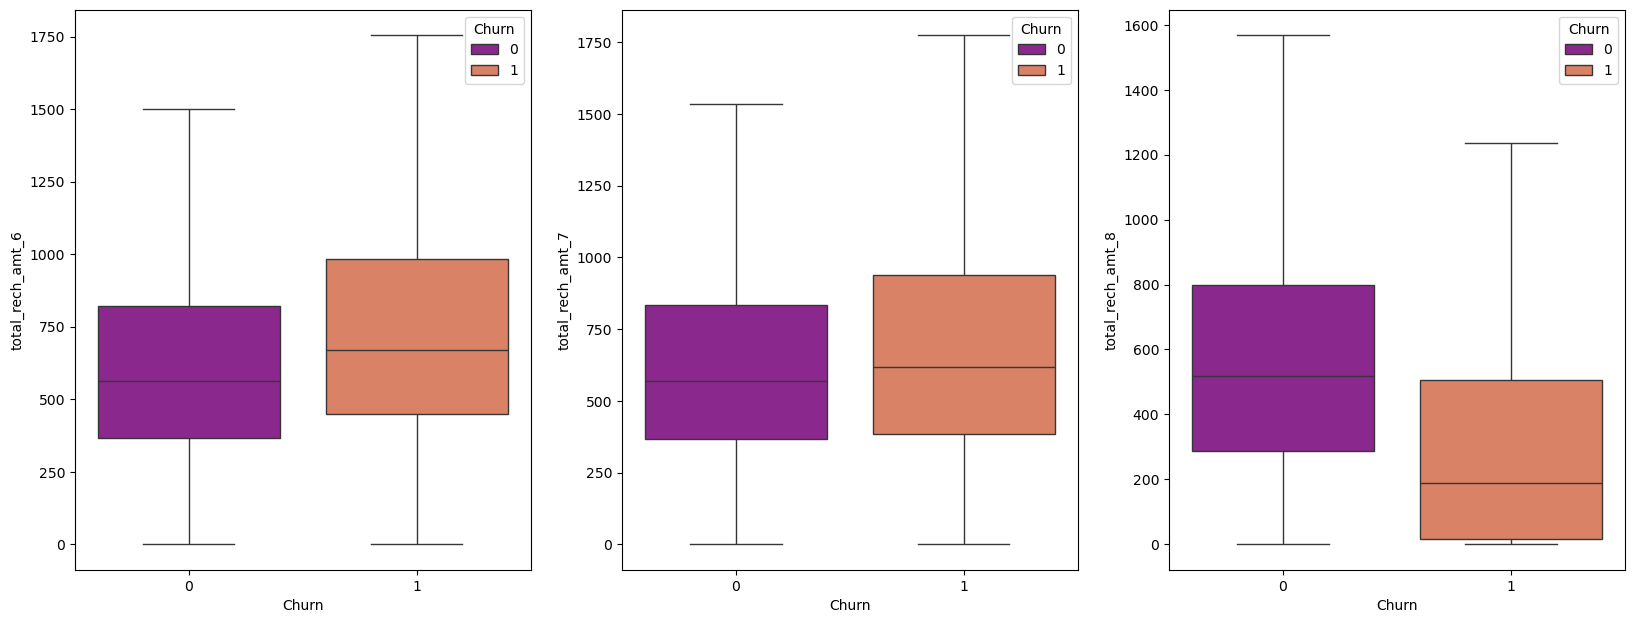

In [76]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase)

In [77]:
recharge_amnt_columns =  df2.columns[df2.columns.str.contains('rech_data')]
recharge_amnt_columns.tolist()

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8']

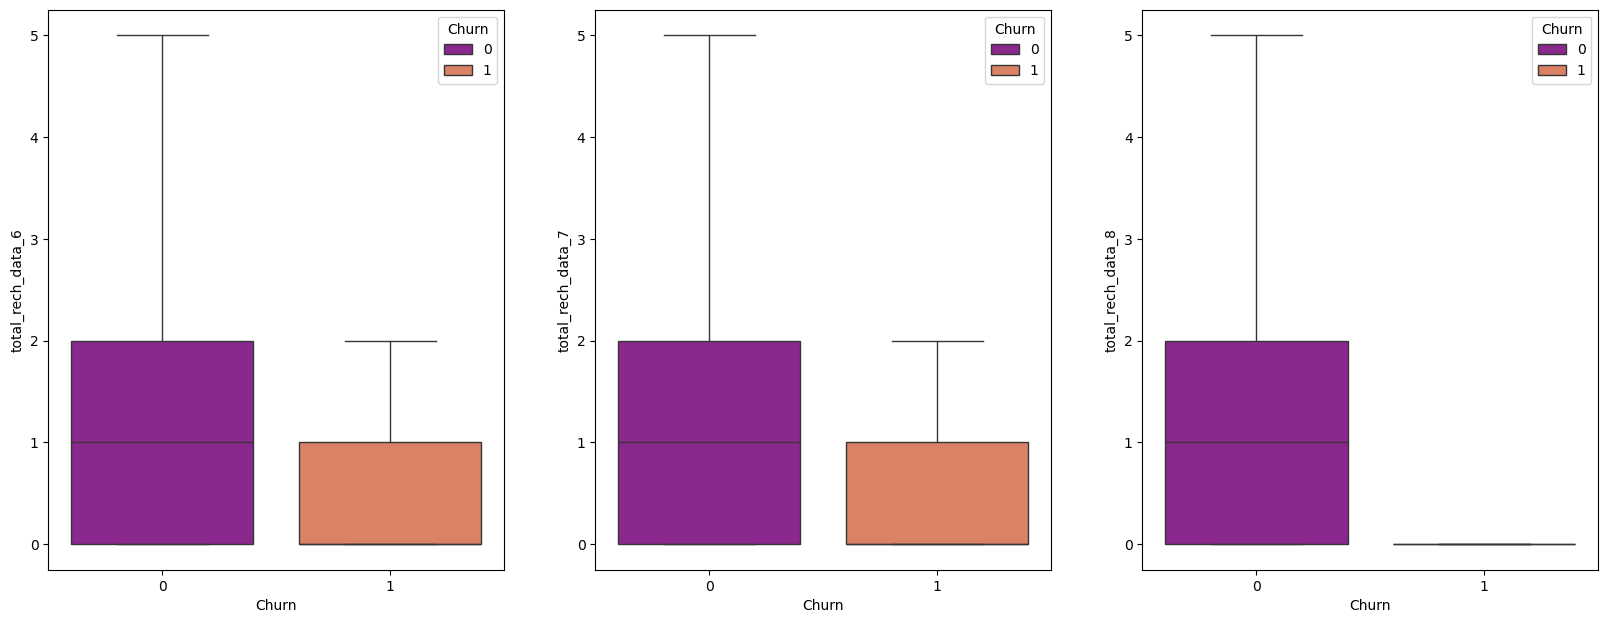

In [78]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_data')

We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

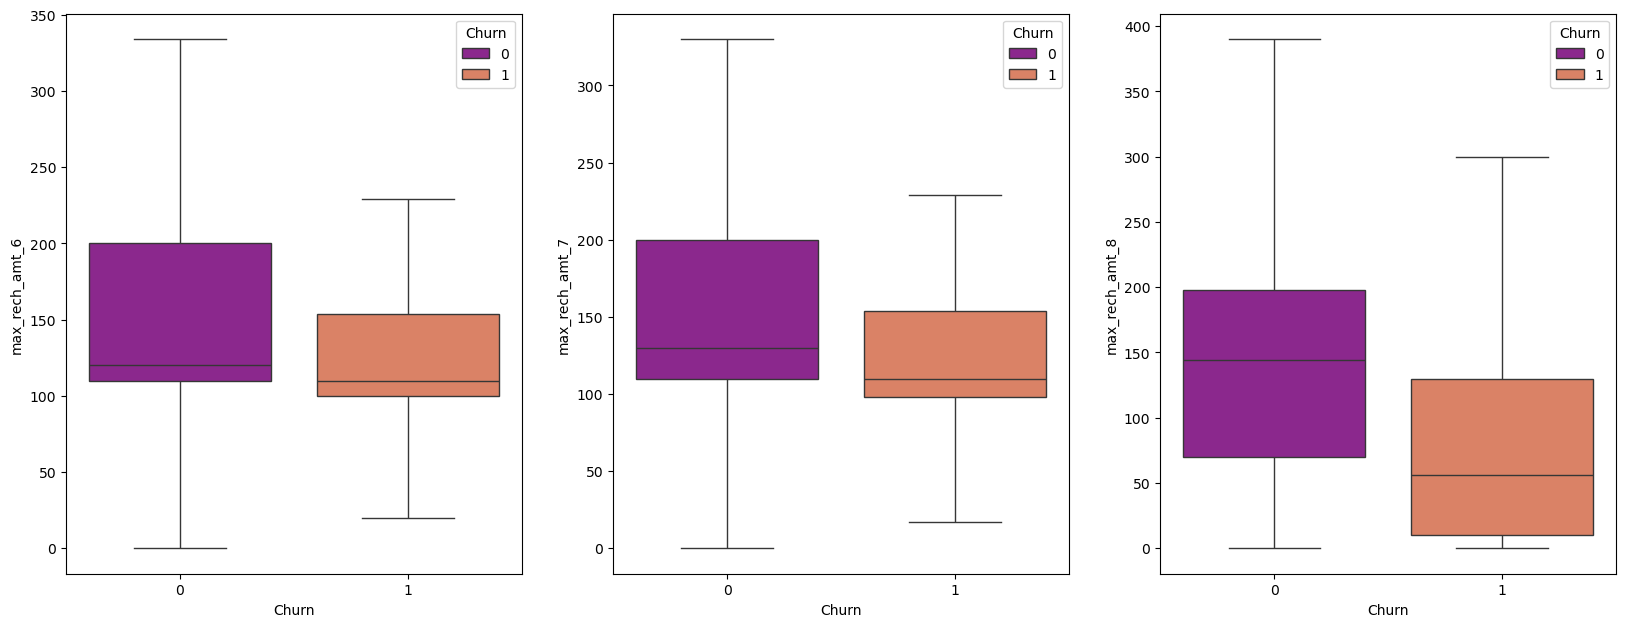

In [79]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

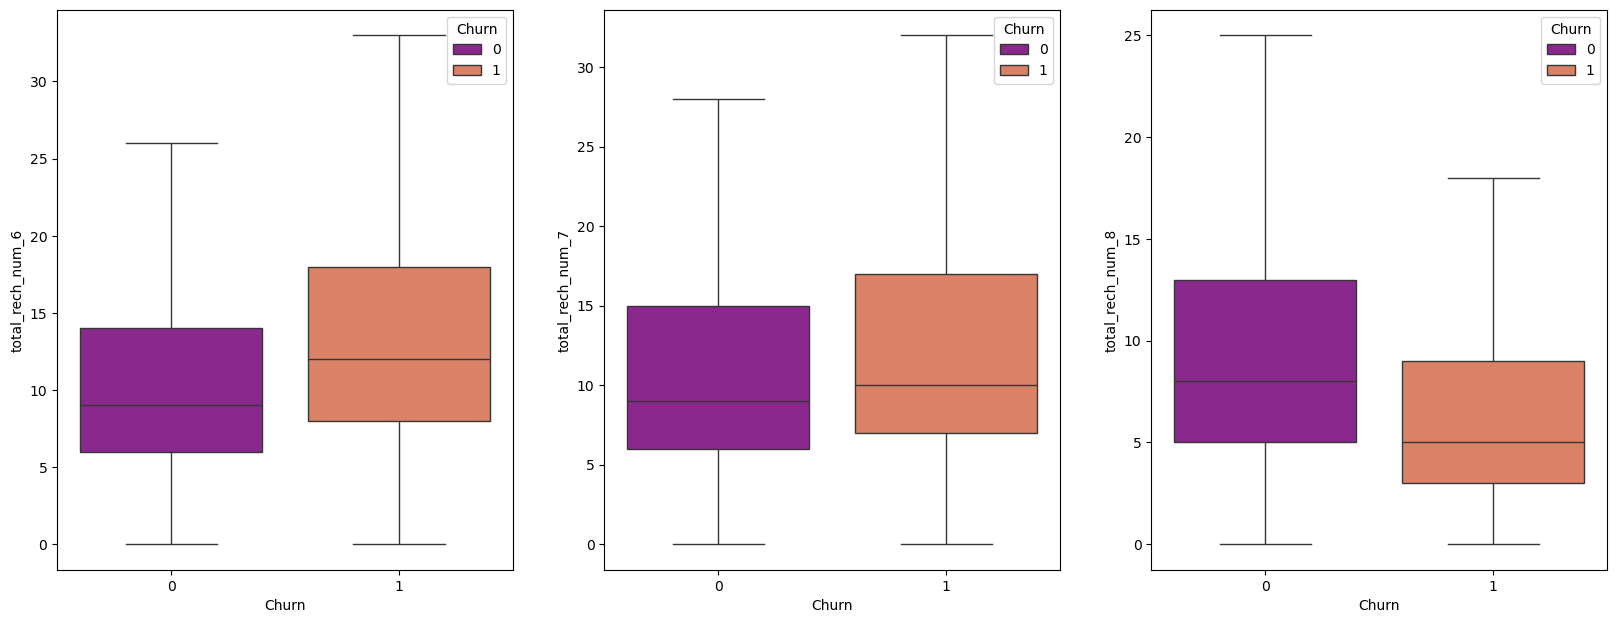

In [80]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

We can see that there is a huge drop in total recharge number in the 8th month (action phase) for churned customers.

#### 2G and 3G usage related attributes

In [81]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = df2.columns[df2.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

#### Minutes of usage - voice calls

In [82]:
mou_cols = df2.columns[df2.columns.str.contains('mou')]

In [83]:
mou_og_cols6 = df2.columns[df2.columns.str.contains('.*_og_.*mou_6',regex=True)]
mou_og_cols6

Index(['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6'],
      dtype='object')

In [84]:
df2.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,20.887778,75.926214,159.147072,5.658916,1.334124,248.405784,152.334925,164.142115,1.294112,333.253664,1.209803,5.211179,604.057055
std,67.213556,136.211308,201.263762,13.039297,3.737714,305.956665,315.933056,312.958321,5.282458,522.202223,10.220383,10.642991,608.651285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.330000,22.230000,0.000000,0.000000,37.490000,0.000000,0.000000,0.000000,0.810000,0.000000,0.000000,134.847500
50%,0.000000,26.220000,81.970000,0.200000,0.000000,132.545000,3.485000,18.570000,0.000000,51.600000,0.000000,0.310000,427.855000
75%,0.000000,80.995000,215.115000,4.510000,0.000000,340.692500,117.045000,159.810000,0.000000,475.945000,0.000000,5.340000,867.200000
max,375.621025,782.961273,920.786723,74.204188,20.652147,1404.470489,1375.533550,1401.206096,38.007569,2165.548348,138.754854,59.029667,2676.131317


#### Plotting Heat Maps

In [85]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="crest",annot=True)
    plt.show()

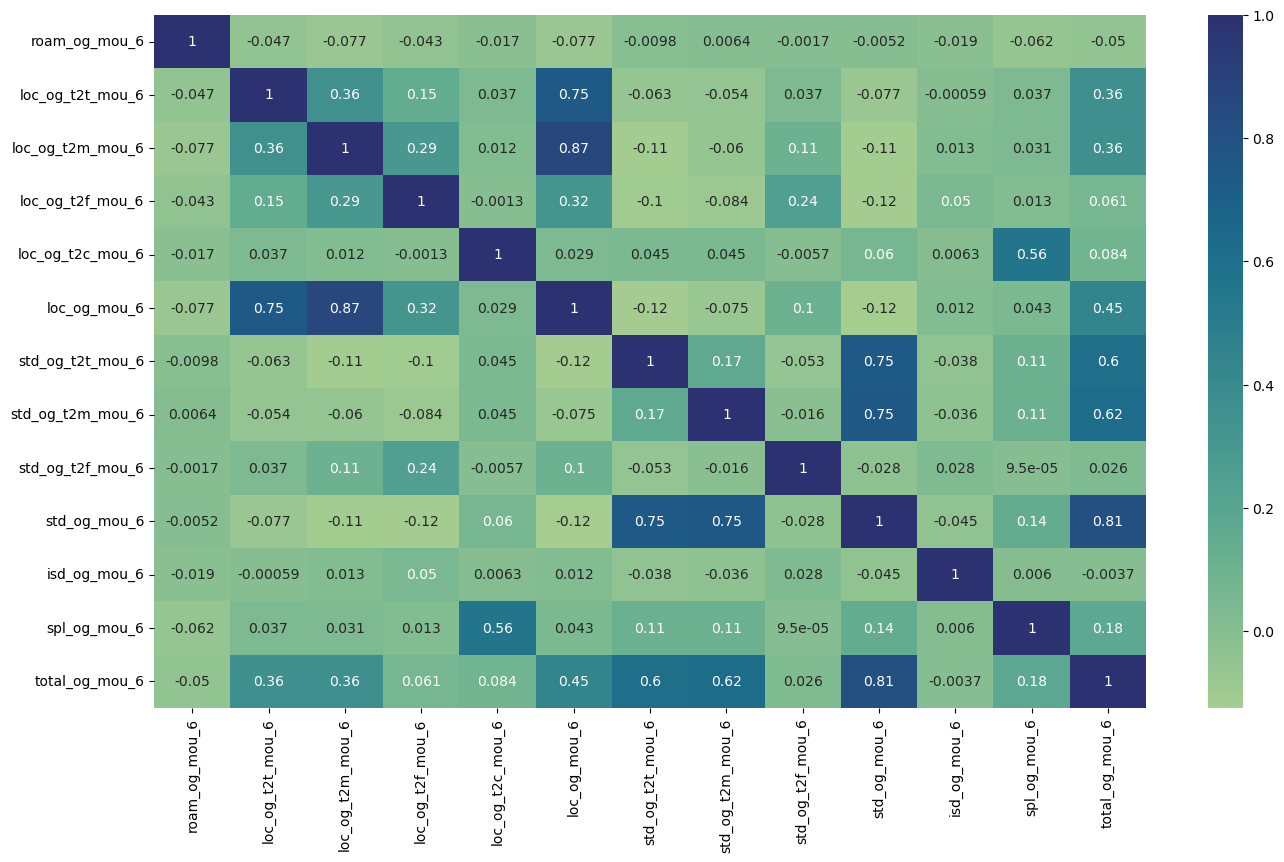

In [86]:
heatmap(16,9,df2.filter(mou_og_cols6))

In [87]:
#Dropping highly corelated attributes
list_total_og_cols = df2.columns[df2.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
df2.drop(list_total_og_cols,axis=1,inplace=True)

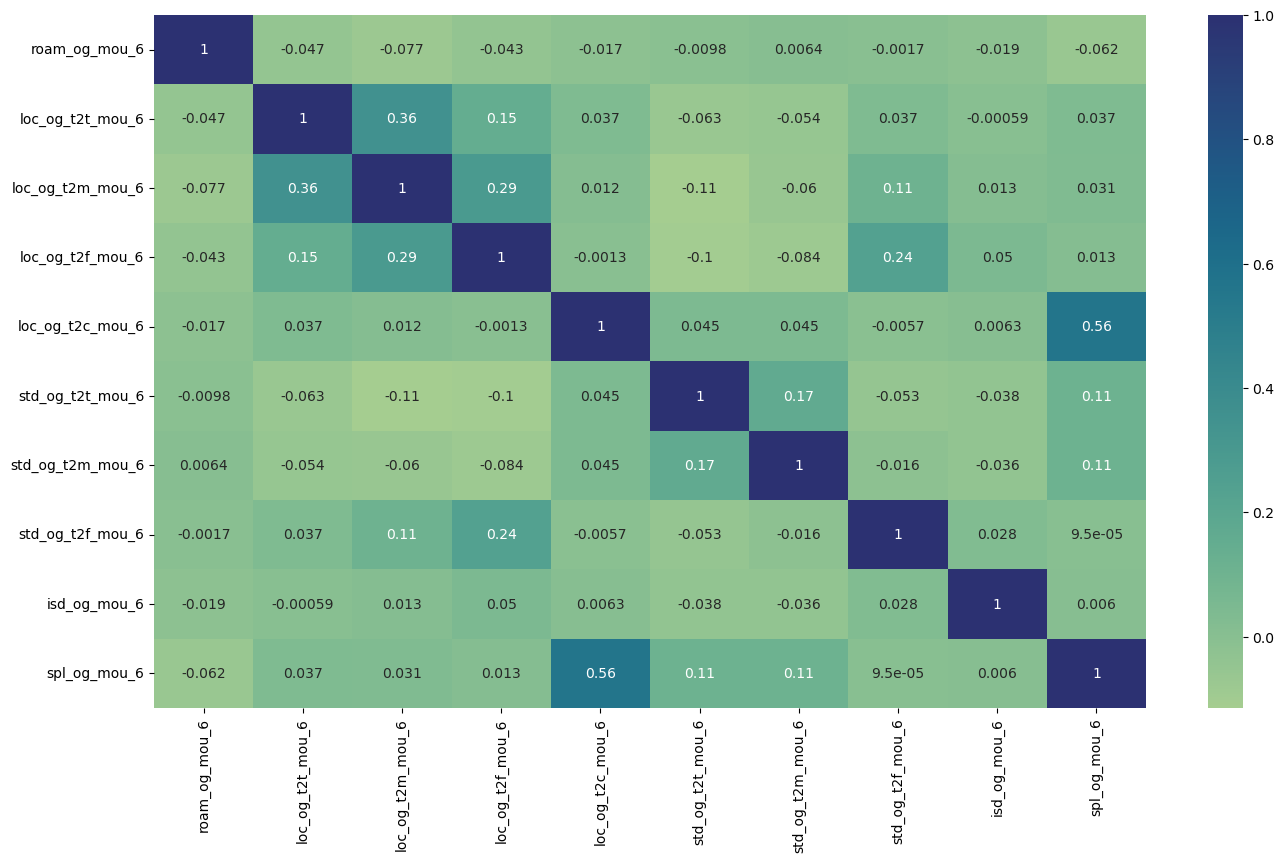

In [88]:
heatmap(16,9,df2.filter(mou_og_cols6))

##### Checking for incoming mou variables

In [89]:
mou_ic_cols6 = df2.columns[df2.columns.str.contains('.*_ic_.*mou_6',regex=True)]

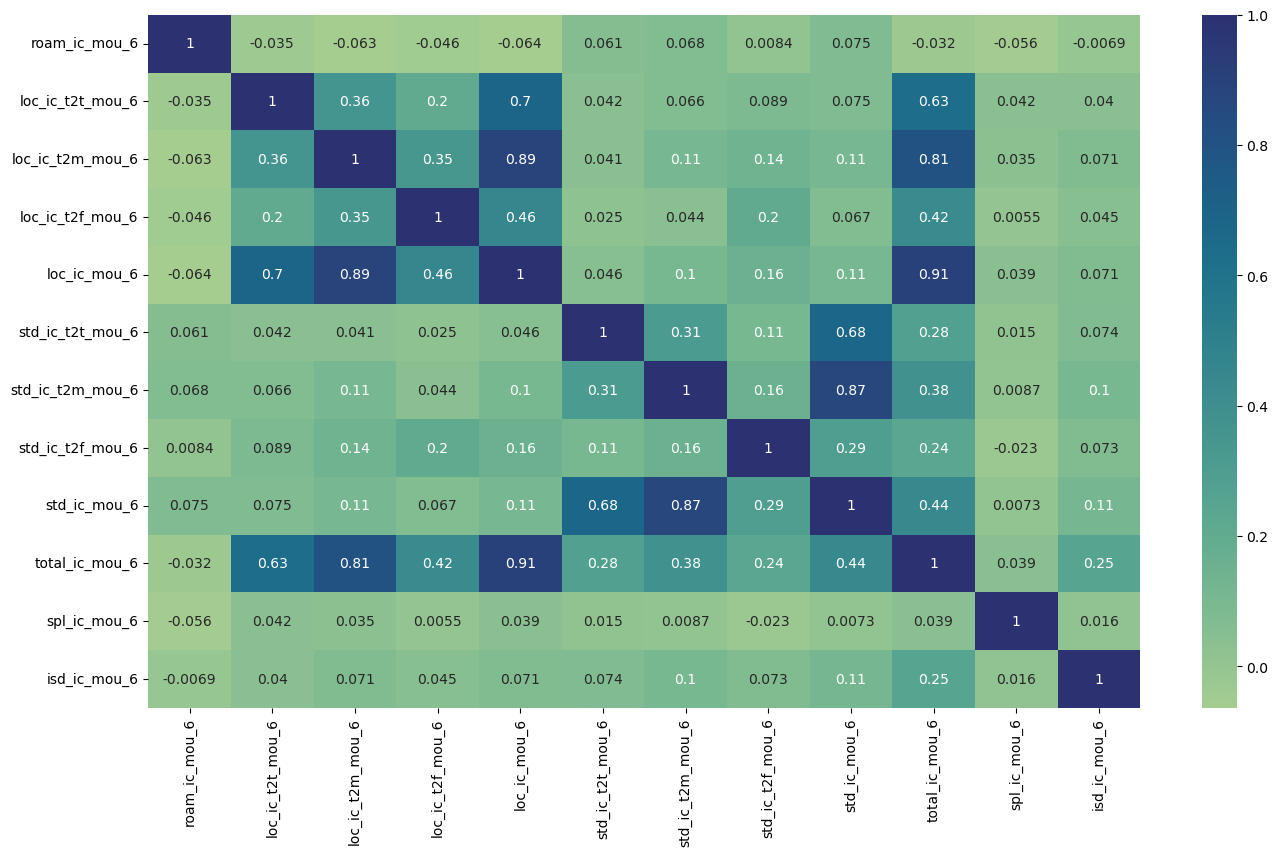

In [90]:
heatmap(16,9,df2.filter(mou_ic_cols6))

In [91]:
#Dropping highly corelated attributes
list_total_ic_cols = df2.columns[df2.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
df2.drop(list_total_ic_cols,axis=1,inplace=True)

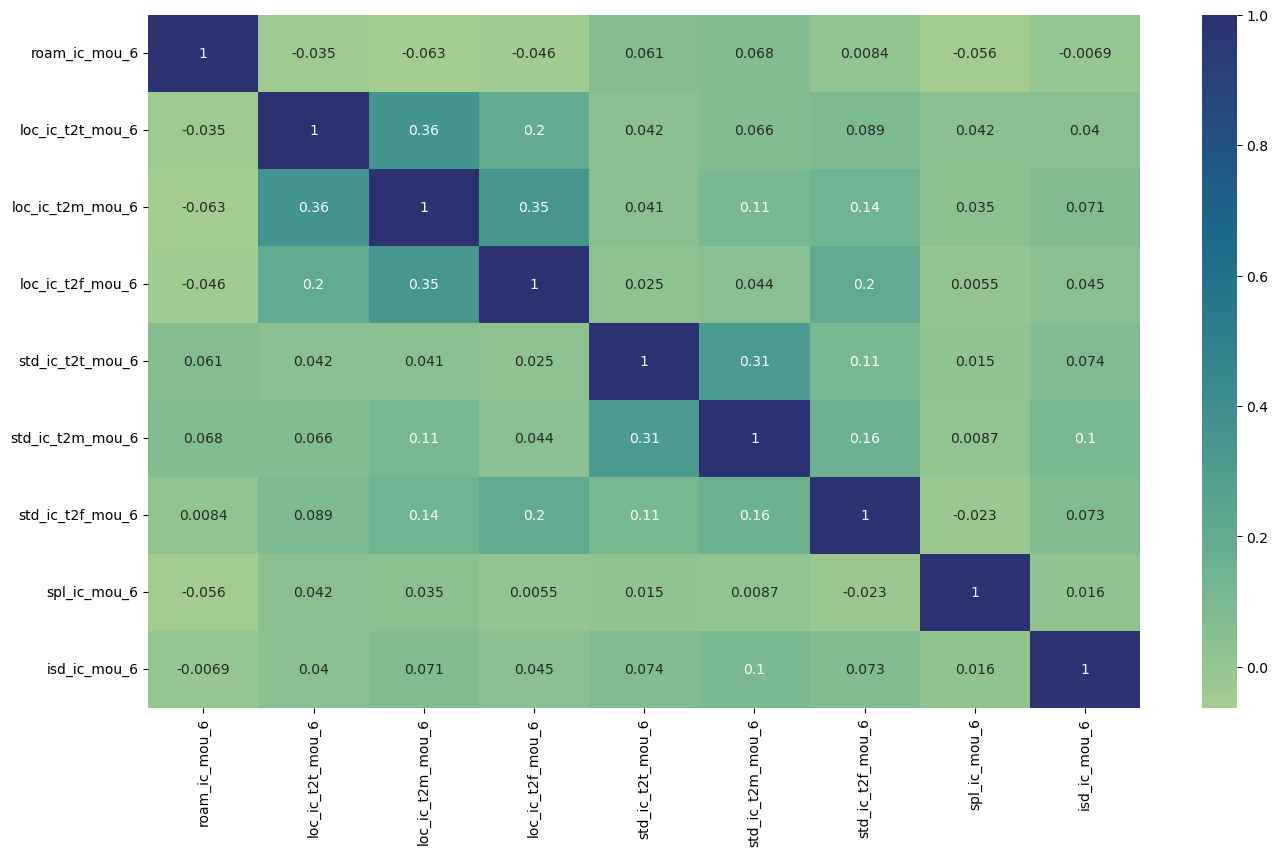

In [92]:
heatmap(16,9,df2.filter(mou_ic_cols6))

#### Tenure Analysis for Customers

In [93]:
tenure_data = df2.copy()
tenure_data['tenure'] = tenure_data['aon']/30

In [94]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0        2-5 Yrs
1    6-12 Months
2        1-2 Yrs
3        1-2 Yrs
4        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

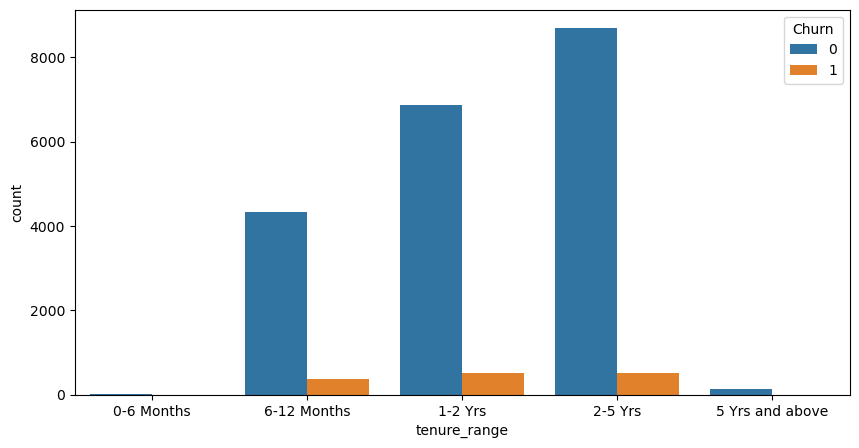

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'tenure_range', hue = 'Churn',data = tenure_data)
plt.show()

## Preprocess Data 

In [96]:
# change churn to numeric
df2['Churn'] = pd.to_numeric(df2['Churn'])

#### Train Test Split

In [97]:
# divide data into train and test
X = df2.drop("Churn", axis = 1)
y = df2.Churn
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,stratify=y,random_state=42)

In [98]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21378, 121)
(21378,)
(7126, 121)
(7126,)


#### Aggregating the Categorical Columns

In [99]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').Churn.mean()
train.groupby('night_pck_user_7').Churn.mean()
train.groupby('night_pck_user_8').Churn.mean()
train.groupby('fb_user_6').Churn.mean()
train.groupby('fb_user_7').Churn.mean()
train.groupby('fb_user_8').Churn.mean()

fb_user_8
-1.0    0.091700
0.0     0.064597
1.0     0.021507
Name: Churn, dtype: float64

In [100]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [101]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['Churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21378 entries, 1356 to 2672
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  21378 non-null  category
 1   night_pck_user_7  21378 non-null  category
 2   night_pck_user_8  21378 non-null  category
 3   fb_user_6         21378 non-null  category
 4   fb_user_7         21378 non-null  category
 5   fb_user_8         21378 non-null  category
dtypes: category(6)
memory usage: 293.1 KB


In [102]:
X_train['night_pck_user_6'] =  pd.to_numeric(X_train['night_pck_user_6'])
X_train['night_pck_user_7'] =  pd.to_numeric(X_train['night_pck_user_7'])
X_train['night_pck_user_8'] =  pd.to_numeric(X_train['night_pck_user_8'])
X_train['fb_user_6'] =  pd.to_numeric(X_train['fb_user_6'])
X_train['fb_user_7'] =  pd.to_numeric(X_train['fb_user_7'])
X_train['fb_user_8'] =  pd.to_numeric(X_train['fb_user_8'])

In [103]:
X_train[[col for col in cat_cols if col not in ['Churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21378 entries, 1356 to 2672
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  21378 non-null  float64
 1   night_pck_user_7  21378 non-null  float64
 2   night_pck_user_8  21378 non-null  float64
 3   fb_user_6         21378 non-null  float64
 4   fb_user_7         21378 non-null  float64
 5   fb_user_8         21378 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [104]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object', length=121)

#### Model Building

In [106]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## PCA

In [107]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [108]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [109]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))


0       12.38
1       22.02
2       27.52
3       32.49
4       36.24
5       39.52
6       42.45
7       45.18
8       47.76
9       50.16
10      52.34
11      54.38
12      56.34
13      58.12
14      59.87
15      61.55
16      63.03
17      64.41
18      65.70
19      66.96
20      68.20
21      69.38
22      70.50
23      71.58
24      72.63
25      73.65
26      74.62
27      75.56
28      76.44
29      77.27
30      78.09
31      78.89
32      79.61
33      80.32
34      81.01
35      81.68
36      82.32
37      82.95
38      83.56
39      84.15
40      84.71
41      85.23
42      85.74
43      86.25
44      86.75
45      87.22
46      87.68
47      88.12
48      88.55
49      88.98
50      89.40
51      89.80
52      90.20
53      90.57
54      90.94
55      91.27
56      91.59
57      91.91
58      92.20
59      92.50
60      92.78
61      93.06
62      93.32
63      93.56
64      93.80
65      94.04
66      94.28
67      94.51
68      94.74
69      94.97
70      95.19
71    

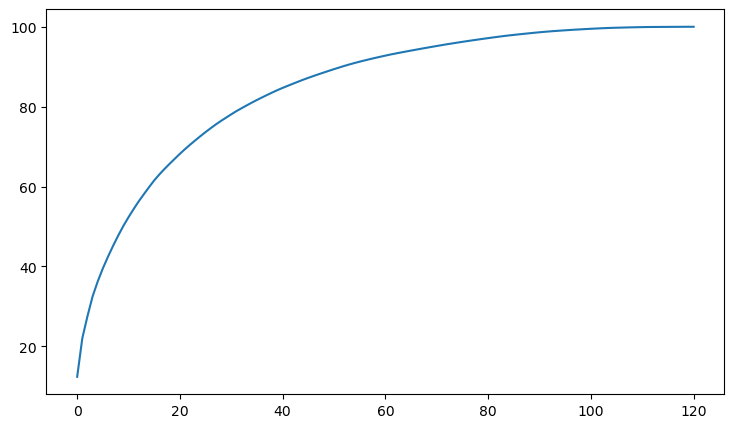

In [110]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

as we can see from the graph, 60 components explain above 90% variance

#### PCA and Logistic Regression

In [111]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [112]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8029750210496772

In [113]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5428 1299]
 [  77  322]]
Sensitivity: 	0.81
Specificity: 	0.81
AUC:    	 0.87


#### Hyperparameter tuning - PCA and Logistic Regression

In [114]:
# class imbalance
y_train.value_counts()/y_train.shape

Churn
0    0.944008
1    0.055992
Name: count, dtype: float64

In [115]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [116]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [117]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.116608,0.024420,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,1.391716,0.060561,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,1.427384,0.091890,0.070866,0.006330,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.866964,0.847749,0.864922,0.873622,0.867119,0.864075,0.008672,9
3,1.956507,0.289478,0.317034,0.304958,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.869039,0.852066,0.868490,0.874055,0.871985,0.867127,0.007797,1
4,1.337480,0.235323,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,1.533185,0.056829,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,1.457325,0.065026,0.109910,0.048386,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.864729,0.847038,0.864624,0.872256,0.866569,0.863043,0.008471,12
7,1.883878,0.058113,0.113658,0.030830,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.870213,0.850778,0.866998,0.874917,0.872585,0.867098,0.008571,2
8,1.387565,0.187003,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,1.826210,0.170365,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [118]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8671268494071184
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [119]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5998  729]
 [ 123  276]]
Sensitivity: 	0.69
Specificity: 	0.89
AUC:    	 0.88


#### Random Forest

In [120]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [121]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [122]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8972359975092801
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [123]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6650   77]
 [ 281  118]]
Sensitivity: 	0.3
Specificity: 	0.99
AUC:    	 0.91


### Selecting the  best Features

In [131]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

11


In [132]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

In [133]:
# OOB score
rf_model.oob_score_

0.9487791187201796

In [134]:
len(X_train.columns)

121

In [135]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[6670   57]
 [ 301   98]]
Sensitivity: 	0.25
Specificity: 	0.99
ROC:    	 0.91


the sensitivity is less, the model PCA with logistic regression is best model

#### Feature Importance

In [136]:
# predictors
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,roam_og_mou_8,6.269508
1,loc_ic_t2m_mou_8,5.324582
2,loc_ic_t2t_mou_8,4.891519
3,roam_ic_mou_8,4.171228
4,last_day_rch_amt_8,3.807846
5,total_rech_amt_8,3.340778
6,loc_og_t2m_mou_8,2.927486
7,loc_og_t2t_mou_8,2.537253
8,arpu_8,2.061156
9,av_rech_amt_data_8,2.049786


In [137]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<Axes: >

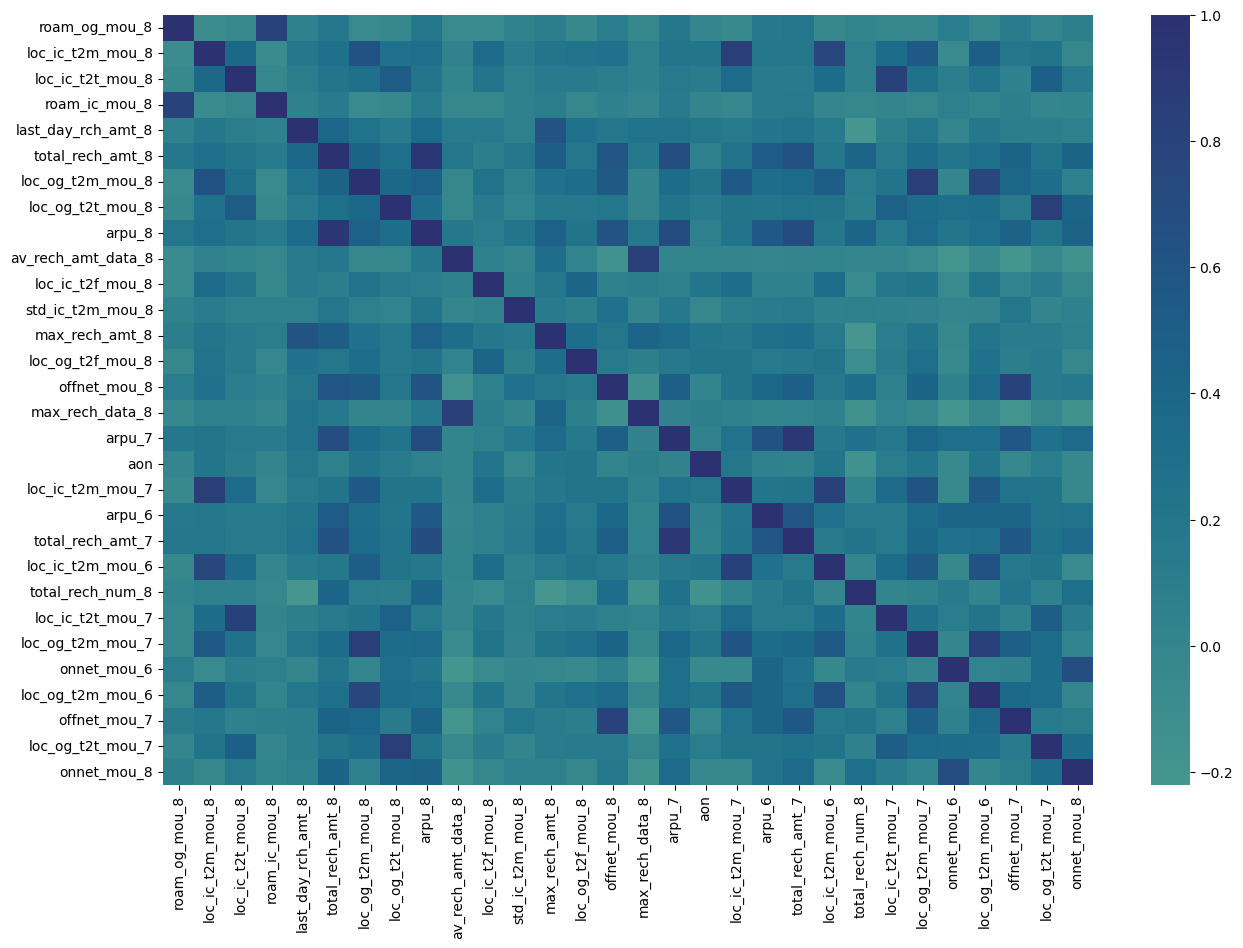

In [138]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap="crest")

In [139]:
X_train = X_train[top_features]
X_test = X_test[top_features]

In [140]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [141]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [142]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8670262229391996
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2'}


In [143]:
### Evaluate the model 

In [144]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6035  692]
 [ 125  274]]
Sensitivity: 	0.69
Specificity: 	0.9
ROC:    	 0.88


The sensitivity is increased when we use top 30 features.

### Extract the intercept and the coefficients from the logistic model 

In [145]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [146]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
intercept_df

,intercept
0,-1.8297


In [147]:
# coefficients
coefficients = logistic_model.coef_.reshape((30, 1)).tolist()
coefficients

[[0.2612587621089706],
 [-0.8025637318043285],
 [-0.4061643662992781],
 [0.049917285212265204],
 [-0.46076006653673435],
 [-0.3040802188643286],
 [-0.29148558969781685],
 [-0.1221490103028965],
 [0.24920570486131108],
 [-0.5625553592022492],
 [-0.24308701182553633],
 [-0.1918739383584199],
 [0.1767622086052671],
 [-0.13004773831650682],
 [-0.4050912765310186],
 [-0.3240630549459295],
 [0.599728518282923],
 [-0.24540111222411953],
 [0.22055407527665624],
 [0.1473247586464831],
 [-0.16949806573495516],
 [0.25844044034089675],
 [-0.3811749854509038],
 [0.16785908371117436],
 [-0.012218626145982937],
 [0.21695014876415314],
 [-0.16428480377476407],
 [0.1620232101183819],
 [0.04474240599359293],
 [-0.383109763554437]]

In [148]:
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [149]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_og_mou_8,loc_ic_t2m_mou_8,loc_ic_t2t_mou_8,roam_ic_mou_8,last_day_rch_amt_8,total_rech_amt_8,loc_og_t2m_mou_8,loc_og_t2t_mou_8,arpu_8,av_rech_amt_data_8,loc_ic_t2f_mou_8,std_ic_t2m_mou_8,max_rech_amt_8,loc_og_t2f_mou_8,offnet_mou_8,max_rech_data_8,arpu_7,aon,loc_ic_t2m_mou_7,arpu_6,total_rech_amt_7,loc_ic_t2m_mou_6,total_rech_num_8,loc_ic_t2t_mou_7,loc_og_t2m_mou_7,onnet_mou_6,loc_og_t2m_mou_6,offnet_mou_7,loc_og_t2t_mou_7,onnet_mou_8
0,-1.8297,0.261259,-0.802564,-0.406164,0.049917,-0.46076,-0.30408,-0.291486,-0.122149,0.249206,-0.562555,-0.243087,-0.191874,0.176762,-0.130048,-0.405091,-0.324063,0.599729,-0.245401,0.220554,0.147325,-0.169498,0.25844,-0.381175,0.167859,-0.012219,0.21695,-0.164285,0.162023,0.044742,-0.38311


## Business Insights

- Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
- To look into the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 